In [2]:
# Import
import numpy as np
import pandas as pd   
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [3]:
# Load preprocessed data
df = pd.read_csv("Data/data_pre.csv", index_col=0)

In [4]:
# Print head
df.head()

,FL_DATE,DEP_TIME,TAXI_OUT,DEP_DELAY,TEMP,WIND,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_US,OP_CARRIER_United Airlines
0,2010-01-01,22:36:00,18.0,121.0,34.7,12.4,0,0,0,1,0,0,0,0,0,0
1,2010-01-01,16:22:00,21.0,7.0,38.1,12.9,0,0,0,1,0,0,0,0,0,0
2,2010-01-01,22:38:00,23.0,3.0,34.7,12.4,0,0,0,1,0,0,0,0,0,0
3,2010-01-01,10:24:00,23.0,-1.0,35.4,13.0,0,0,0,1,0,0,0,0,0,0
4,2010-01-01,18:27:00,31.0,-3.0,36.5,12.8,0,0,0,1,0,0,0,0,0,0


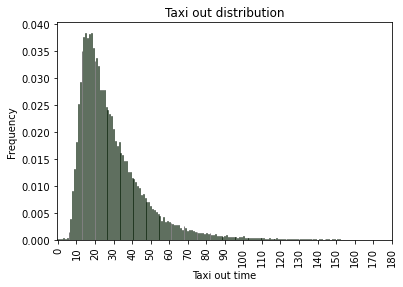

In [5]:
# Plot taxi out time
df_tax = df.groupby(["TAXI_OUT"]).size() 
df_tax = df_tax / df_tax.sum()
df_tax.plot.bar(color='green', alpha=0.5, edgecolor='black')
plt.xticks(ticks = np.arange(0, 186, 10), labels = np.arange(0, 186, 10))
plt.title('Taxi out distribution')
plt.xlabel('Taxi out time')
plt.ylabel('Frequency');

### Might follow a Gamma distribution?

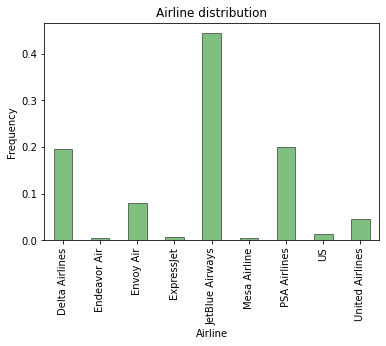

In [6]:
# Get all operators
df_ops = df.filter(regex='OP_CARRIER')
df_ops = df_ops.sum()[1:]

# Get labels
labs = []
lst_idx = list(df_ops.index)
for i in range(len(lst_idx)):
    labs.append(lst_idx[i].replace('OP_CARRIER_', ''))

# Set labels as index
df_ops = df_ops.set_axis(labs)
df_ops = df_ops / sum(df_ops)
df_ops.plot.bar(color='green', alpha=0.5, edgecolor='black')
plt.title('Airline distribution')
plt.xlabel('Airline')
plt.ylabel('Frequency');

> We see that PSA Airlines, Delta Airlines and JetBlue Airways are the most used airlines in 2010

/var/folders/fs/10_w6dn131d7nmw8myr18l6r0000gn/T/ipykernel_50717/579655822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['DEP_TIME'] = pd.to_datetime(delays.DEP_TIME, format="%H:%M:%S").dt.hour


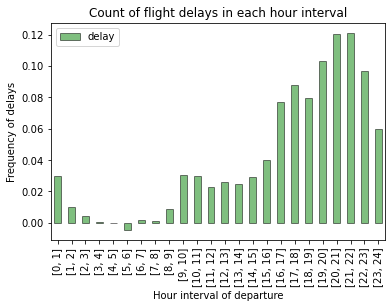

In [7]:
delays = df[['DEP_DELAY', 'DEP_TIME']]
delays['DEP_TIME'] = pd.to_datetime(delays.DEP_TIME, format="%H:%M:%S").dt.hour

# Group by delays
labels = ["[0, 1]", "[1, 2]", "[2, 3]", "[3, 4]", "[4, 5]", "[5, 6]",  "[6, 7]", "[7, 8]", "[8, 9]", "[9, 10]", "[10, 11]", "[11, 12]", "[12, 13]", "[13, 14]", "[14, 15]", "[15, 16]", "[16, 17]", "[17, 18]", "[18, 19]", "[19, 20]", "[20, 21]", "[21, 22]", "[22, 23]", "[23, 24]"] # labels
bins= np.arange(0,25) # intervals
X_dep = delays.copy() # Copy data frame
X_cut = pd.cut(delays['DEP_TIME'], bins=bins, labels=labels, right=False) # cut dataframe
X_dep['dep_group'] = X_cut # Add temp_group

# Create new data frame
cols = ['delay']
df_dep = pd.DataFrame(index=labels, columns=cols)

# take values
values = X_dep.groupby(['dep_group', 'DEP_DELAY']).size()

# Loop
for idx, t in enumerate(labels):
    # Assign total number of crimes
    df_dep.delay[idx] = X_dep[X_dep.dep_group == t]['DEP_DELAY'].sum()
    

# Add column and reset index
df_dep['dep_group'] = labels
df_dep = df_dep.reset_index().drop('index', axis=1)

# Plot the data frame in each group
df_dep.set_index('dep_group', inplace=True)
df_dep = df_dep / sum(df_dep.delay)
ax = df_dep.plot.bar(color='green', alpha=0.5, edgecolor='black')
ax.set_xlabel('Hour interval of departure')
ax.set_ylabel('Frequency of delays')
ax.set_title('Count of flight delays in each hour interval');

### Plot over the course of a year

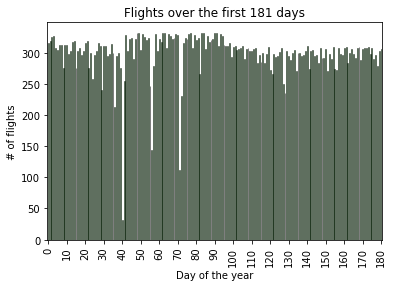

In [8]:
# Plot taxi out time
df_date = df.groupby(["FL_DATE"]).size() 
df_date.plot.bar(color='green', alpha=0.5, edgecolor='black')
plt.xticks(ticks = np.arange(0, 181, 10), labels = np.arange(0, 181, 10))
plt.title('Flights over the first 181 days')
plt.xlabel('Day of the year')
plt.ylabel('# of flights');

In [9]:
df_date[df_date == min(df_date)]

FL_DATE
2010-02-10    31
dtype: int64

(array([5.033e+04, 3.038e+03, 6.390e+02, 1.440e+02, 2.100e+01, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([-23. ,  68.1, 159.2, 250.3, 341.4, 432.5, 523.6, 614.7, 705.8,
        796.9, 888. ]),
 <BarContainer object of 10 artists>)

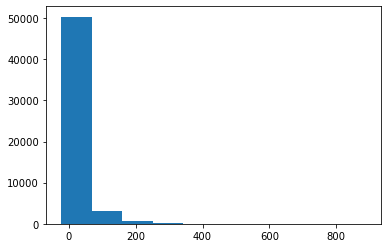

In [13]:
plt.hist(df.DEP_DELAY)